# Principal Components Analysis on the UCI Image Segmentation Data Set.
### Kevin Maher
### <span style="color:blue">Vettejeep365@gmail.com</span>

This is a multi-class classification problem.  The objective is to predict whether a picture is one of grass, path, window, etc.  There are 19 features and 2310 different instances in the model data from UCI.  My objective here is to determine if the number of features needed for the model might be reduced by using principal components analysis.

Imports needed for the script. Uses Python 2.7.13, numpy 1.11.3, pandas 0.19.2, sklearn 0.18.1, matplotlib 2.0.0.

In [11]:
%matplotlib inline

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import metrics

Read in the data.  Extra header rows in the UCI data file were manually deleted using OpenOffice.

In [12]:
df = pd.read_csv('segmentation.csv')
print df.head()

   CLASS  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0  GRASS                  110                  189                   9   
1  GRASS                   86                  187                   9   
2  GRASS                  225                  244                   9   
3  GRASS                   47                  232                   9   
4  GRASS                   97                  186                   9   

   SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
0                   0.0                   0.0    1.000000  0.666667   
1                   0.0                   0.0    1.111111  0.720082   
2                   0.0                   0.0    3.388889  2.195113   
3                   0.0                   0.0    1.277778  1.254621   
4                   0.0                   0.0    1.166667  0.691215   

   HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
0    1.222222  1.186342       12.925926    10.888889      

Prepare the data for machine learning by dividing between training and test sets.

In [13]:
y = df['CLASS']
X = df.drop('CLASS', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=245)

Scale the data for principal components analysis.

In [14]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

Check machine learning accuracy with a Random Forest model.

In [15]:
n_est = 100
clf = RandomForestClassifier(n_estimators=n_est, random_state=357)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print 'RF Model: %.2f%% accurate' % (metrics.accuracy_score(y_test, pred) * 100.0)

RF Model: 95.40% accurate


Plot the amount of explained variance for each component of the principal components analysis model.

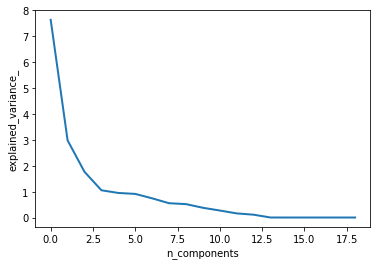

In [ ]:
pca = decomposition.PCA()
pca.fit(X_train)

pca_var = pca.explained_variance_

plt.plot(pca_var, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

plt.show()
plt.close()

Looking at the graph above, it looks like we could cut the number of features to 13 without losing much in the way of model accuracy.  Lets try numbers of features from 10 to 19 to check this hypothesis.

In [ ]:
for i in range(10, X.shape[1] + 1):
    pca = decomposition.PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    clf.fit(X_train_pca, y_train)
    pred = clf.predict(X_test_pca)

    print 'RF Model: %.2f%% accurate with %d PCA components' % ((metrics.accuracy_score(y_test, pred) * 100.0), i)

RF Model: 93.02% accurate with 10 PCA components
RF Model: 94.13% accurate with 11 PCA components
RF Model: 93.49% accurate with 12 PCA components
RF Model: 95.71% accurate with 13 PCA components
RF Model: 94.92% accurate with 14 PCA components
RF Model: 95.40% accurate with 15 PCA components


13 seems to be a good number.  Accuracy is actually a little better than the baseline model (95.7% vs 95.4%) though this may vary some with the exact model used.  Notably, there is more than a 2% falloff in accuracy by going to 12 components.  

This was not a large model so principal components analysis was not really necessary.  But, it illustrates how a model may be reduced in size without necessarily losing much if any model accuracy.  For a model with hundreds of features or more, principal components analysis can help to make for a smaller model that uses fewer computer resources in order to run.

Citation: Image Segmentation Data Set (1990). UCI Machine Learning Repository. Retrieved from: 

http://archive.ics.uci.edu/ml/datasets/image+segmentation